# TASK-2 : Supervised Machine Learning - Simple Linear Regression

## Importing required libraries

In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
import scipy
from sklearn.linear_model import LinearRegression
sn.set()
from sklearn.model_selection import train_test_split 
from sklearn import metrics

## Importing data from the source

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
x=data['Hours']
y=data['Scores']

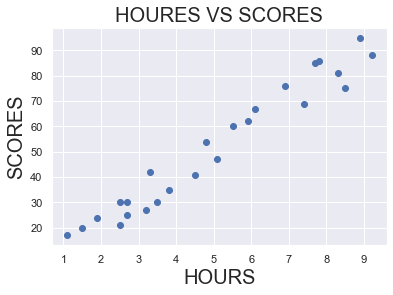

In [4]:
plt.scatter(x,y)
plt.title('HOURES VS SCORES', fontsize=20)
plt.xlabel('HOURS', fontsize= 20)
plt.ylabel('SCORES', fontsize= 20)
plt.show()

####  The graph above shows positive linear relationship between no.of hours studies and the percentage of marks scored.

### Preparing the data

In [5]:
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =365)

## Simple Linear Regression using sklearn & statsmodels 

### Training the algorithm

In [6]:
x_train_matrix = x_train.values.reshape(-1,1)
x_test_matrix = x_test.values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x_train_matrix,y_train)

LinearRegression()

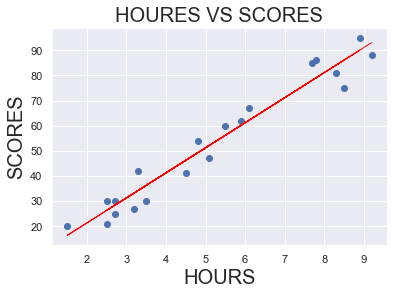

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                 Scores   R-squared:                       0.950
 Model:                            OLS   Adj. R-squared:                  0.948
 Method:                 Least Squares   F-statistic:                     344.9
 Date:                Tue, 06 Oct 2020   Prob (F-statistic):           3.45e-13
 Time:                        20:53:38   Log-Likelihood:                -62.440
 No. Observations:                  20   AIC:                             128.9
 Df Residuals:                      18   BIC:                             130.9
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [7]:
plt.scatter(x_train,y_train)
yhat=reg.coef_*x_train_matrix+reg.intercept_
fig=plt.plot(x_train_matrix,yhat, lw=1, c= 'red')
plt.title('HOURES VS SCORES', fontsize=20)
plt.xlabel('HOURS', fontsize= 20)
plt.ylabel('SCORES', fontsize= 20)
plt.show()
X=sm.add_constant(x_train)
results=sm.OLS(y_train,X).fit()
df=pd.DataFrame({'R-squared':reg.score(x_train_matrix,y_train) , 'Coefficient':reg.coef_ , 'Intercept':reg.intercept_})
results.summary(), df

##### 1. The table above shows R-Squared is 95% & adj. R-Squared is 94.8% (statsmodels summary table)
#### 2. R-squared according to sklearn is also 95%.
###     Theory suggests Model is a good fit.

## Making Predictions

In [8]:
y_predicted = reg.predict(x_test_matrix)
y_predicted

array([39.2597796 , 20.34033368, 70.12834927, 75.10715083, 12.37425119])

##### Comparing Actual vs Predicted Score

In [9]:
Comparing= pd.DataFrame({'Actual': y_test, 'Predictions': y_predicted})
Comparing

,Actual,Predictions
22,35,39.259780
17,24,20.340334
23,76,70.128349
19,69,75.107151
14,17,12.374251


#### Evaluating the performance of the Model

In [10]:
print('Mean Squared Error =', metrics.mean_squared_error(y_test , y_predicted))
print('Mean Absolute Error =', metrics.mean_absolute_error(y_test , y_predicted))


Mean Squared Error = 24.942001088222394
Mean Absolute Error = 4.904799258483659


In [11]:
Hours = 9.25
z = pd.DataFrame({'Hours':[9.25]}).values.reshape(-1,1)
PREDICTIONS = pd.DataFrame({'No of Hours':[Hours] , 'Predicted Score':reg.predict(z)})
PREDICTIONS

,No of Hours,Predicted Score
0,9.25,93.528717


Therefore, for 9.25 hours of study the Predicted Score is 93.5%